## Task 3 OASIS


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preparation

In [6]:
# **1. Data Preparation**
## Load datasets
apps_df = pd.read_csv('C:/Users/user pc/Downloads/Idea Unveiling the Android App Market Analyzing Google Play Store Data/datasets/apps.csv')
reviews_df = pd.read_csv('C:/Users/user pc/Downloads/Idea Unveiling the Android App Market Analyzing Google Play Store Data/datasets/user_reviews.csv')

# Display basic info and first few rows
apps_df.info(), reviews_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      9659 non-null   int64  
 1   App             9659 non-null   object 
 2   Category        9659 non-null   object 
 3   Rating          8196 non-null   float64
 4   Reviews         9659 non-null   int64  
 5   Size            8432 non-null   float64
 6   Installs        9659 non-null   object 
 7   Type            9659 non-null   object 
 8   Price           9659 non-null   object 
 9   Content Rating  9659 non-null   object 
 10  Genres          9659 non-null   object 
 11  Last Updated    9659 non-null   object 
 12  Current Ver     9651 non-null   object 
 13  Android Ver     9657 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 1.0+ MB


(None,
                      App                                  Translated_Review  \
 0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
 1  10 Best Foods for You    This help eating healthy exercise regular basis   
 2  10 Best Foods for You                                                NaN   
 3  10 Best Foods for You         Works great especially going grocery store   
 4  10 Best Foods for You                                       Best idea us   
 
   Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
 0  Positive                1.00                0.533333  
 1  Positive                0.25                0.288462  
 2       NaN                 NaN                     NaN  
 3  Positive                0.40                0.875000  
 4  Positive                1.00                0.300000  )

# Handling missing values

In [7]:
## Handling missing values
apps_df.dropna(inplace=True)
reviews_df.dropna(inplace=True)

apps_df.info(), reviews_df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7021 entries, 0 to 9658
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      7021 non-null   int64  
 1   App             7021 non-null   object 
 2   Category        7021 non-null   object 
 3   Rating          7021 non-null   float64
 4   Reviews         7021 non-null   int64  
 5   Size            7021 non-null   float64
 6   Installs        7021 non-null   object 
 7   Type            7021 non-null   object 
 8   Price           7021 non-null   object 
 9   Content Rating  7021 non-null   object 
 10  Genres          7021 non-null   object 
 11  Last Updated    7021 non-null   object 
 12  Current Ver     7021 non-null   object 
 13  Android Ver     7021 non-null   object 
dtypes: float64(2), int64(2), object(10)
memory usage: 822.8+ KB


(None,
                      App                                  Translated_Review  \
 0  10 Best Foods for You  I like eat delicious food. That's I'm cooking ...   
 1  10 Best Foods for You    This help eating healthy exercise regular basis   
 3  10 Best Foods for You         Works great especially going grocery store   
 4  10 Best Foods for You                                       Best idea us   
 5  10 Best Foods for You                                           Best way   
 
   Sentiment  Sentiment_Polarity  Sentiment_Subjectivity  
 0  Positive                1.00                0.533333  
 1  Positive                0.25                0.288462  
 3  Positive                0.40                0.875000  
 4  Positive                1.00                0.300000  
 5  Positive                1.00                0.300000  )

In [8]:
## Convert data types
#apps_df['Price'] = apps_df['Price'].replace({'$': ''}, regex=True).astype(float)
#apps_df['Size'] = apps_df['Size'].replace({'M': '*1e6', 'k': '*1e3'}, regex=True).map(pd.eval).fillna(0).astype(float)
#apps_df['Installs'] = apps_df['Installs'].replace({',': '', '+': ''}, regex=True).astype(int)

## Convert data types
# Remove '$' and convert Price to float, setting 'Free' apps to 0
apps_df['Price'] = apps_df['Price'].replace({r'\$': ''}, regex=True)
apps_df['Price'] = apps_df['Price'].replace('Free', '0').astype(float)

In [9]:
# Convert Size column to numerical values (handling M and k units)
apps_df['Size'] = apps_df['Size'].replace({'M': '*1e6', 'k': '*1e3'}, regex=True).map(pd.eval).fillna(0).astype(float)

In [10]:
# Convert Installs column to numerical values
apps_df['Installs'] = apps_df['Installs'].replace({',': '', r'\+': ''}, regex=True).astype(int)

In [11]:
# Save cleaned data
apps_df.to_csv('C:/VS Code New/OASIS/Task_3/cleaned_apps.csv', index=False)
print("Cleaned dataset saved as cleaned_apps.csv")

# Clean reviews dataset
reviews_df.dropna(subset=['Translated_Review'], inplace=True)
reviews_df.to_csv('C:/VS Code New/OASIS/Task_3//cleaned_reviews.csv', index=False)
print("Cleaned dataset saved as cleaned_reviews.csv")

Cleaned dataset saved as cleaned_apps.csv
Cleaned dataset saved as cleaned_reviews.csv


# Category Exploration

C:\Users\user pc\AppData\Local\Temp\ipykernel_7640\1105067777.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




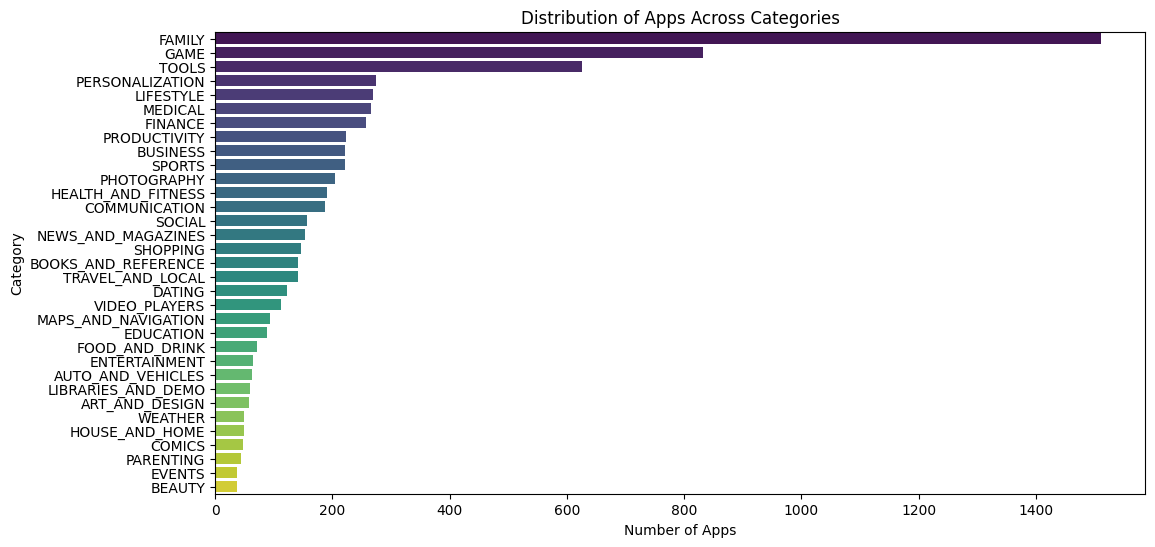

In [35]:
# **2. Category Exploration**
## Investigate app distribution across categories
category_counts = apps_df['Category'].value_counts()
plt.figure(figsize=(12, 6))
sns.barplot(y=category_counts.index, x=category_counts.values, palette='viridis')
plt.xlabel('Number of Apps')
plt.ylabel('Category')
plt.title('Distribution of Apps Across Categories')
plt.show()


# Metrics Analysis

C:\Users\user pc\AppData\Local\Temp\ipykernel_7640\3496673284.py:10: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



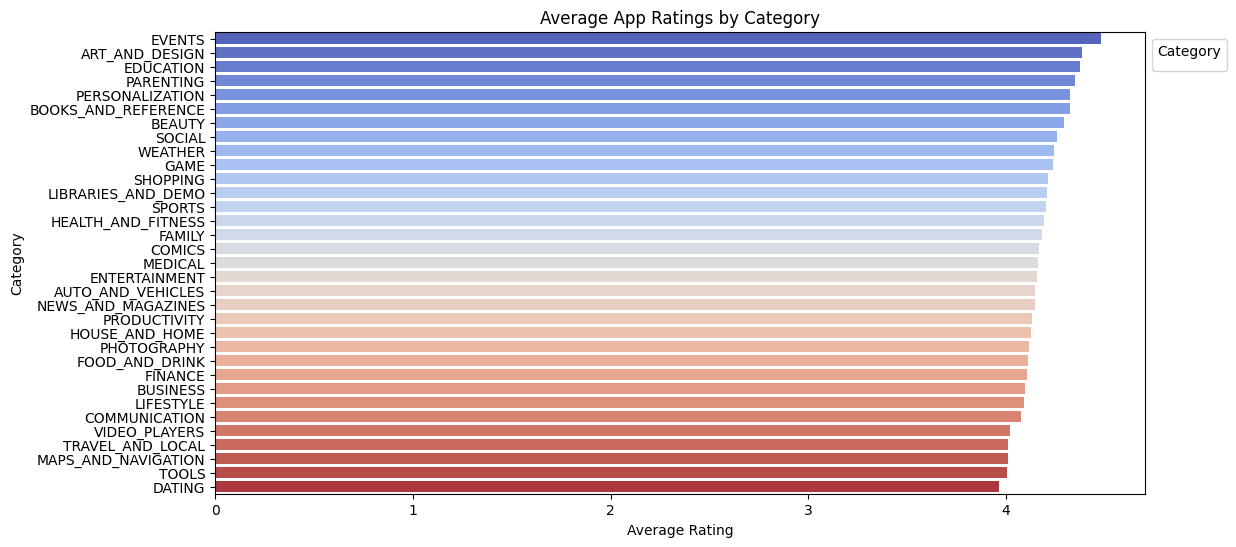

C:\Users\user pc\AppData\Local\Temp\ipykernel_7640\3496673284.py:19: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



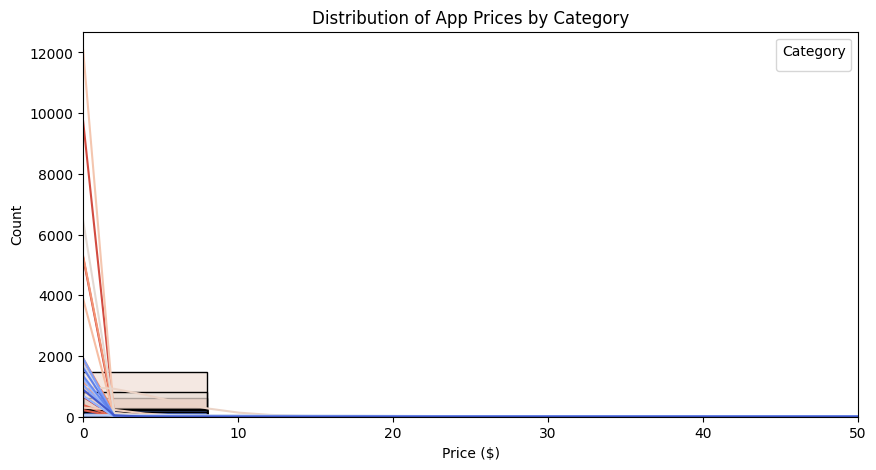

In [34]:


# **3. Metrics Analysis**
## Analyze key metrics such as ratings, popularity, and pricing trends
## Average Ratings per Category
avg_ratings = apps_df.groupby('Category')['Rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
sns.barplot(y=avg_ratings.index, x=avg_ratings.values, palette='coolwarm', hue=avg_ratings.index)
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.title('Average App Ratings by Category')
plt.legend(title='Category', bbox_to_anchor=(1,1))
plt.show()

## Pricing Trends
plt.figure(figsize=(10, 5))
sns.histplot(apps_df, x='Price', bins=50, kde=True, hue='Category', palette='coolwarm')
plt.xlim(0, 50)  # Focus on lower price range
plt.xlabel('Price ($)')
plt.title('Distribution of App Prices by Category')
plt.legend(title='Category', bbox_to_anchor=(1,1))
plt.show()



C:\Users\user pc\AppData\Local\Temp\ipykernel_7640\2706444425.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sentiment', bbox_to_anchor=(1,1))


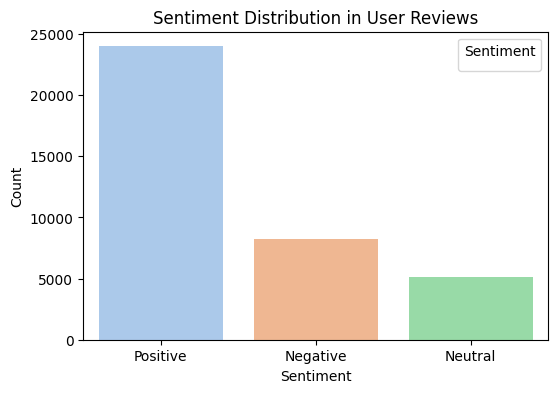

In [14]:
# **4. Sentiment Analysis**
## Assess user sentiments through reviews
sentiment_counts = reviews_df['Sentiment'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel', hue=sentiment_counts.index)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution in User Reviews')
plt.legend(title='Sentiment', bbox_to_anchor=(1,1))
plt.show()

# Top 10 Most Installed Apps

C:\Users\user pc\AppData\Local\Temp\ipykernel_7640\899455863.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_installed['App'], x=top_installed['Installs'], palette='magma')


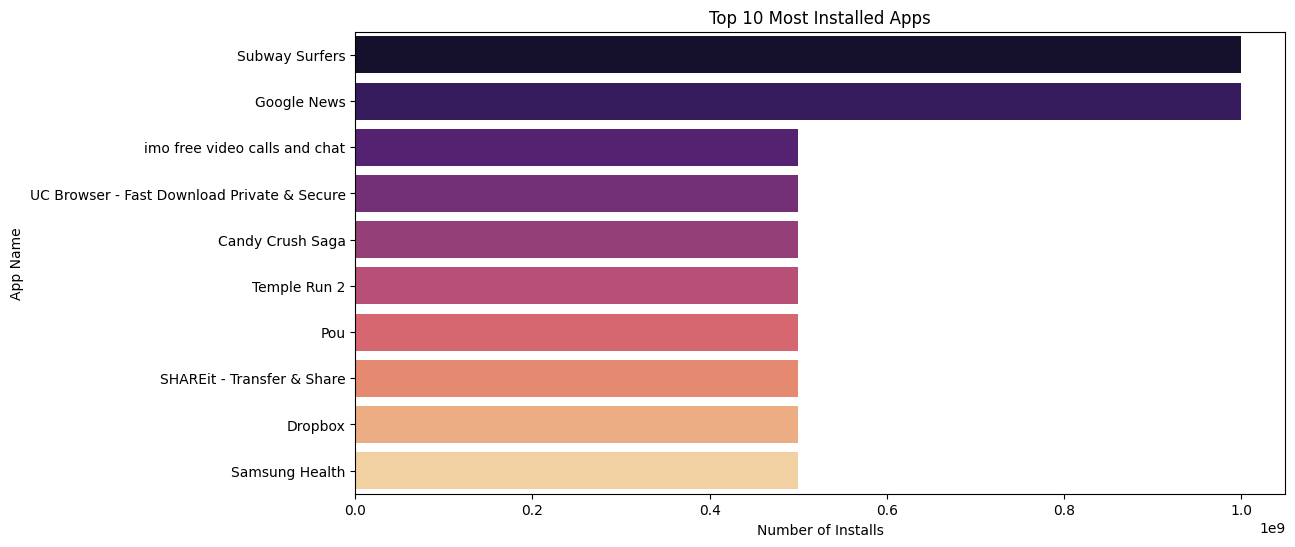

In [15]:
## Top 10 Most Installed Apps
top_installed = apps_df.nlargest(10, 'Installs')
plt.figure(figsize=(12, 6))
sns.barplot(y=top_installed['App'], x=top_installed['Installs'], palette='magma')
plt.xlabel('Number of Installs')
plt.ylabel('App Name')
plt.title('Top 10 Most Installed Apps')
plt.show()

# Correlation Heatmap

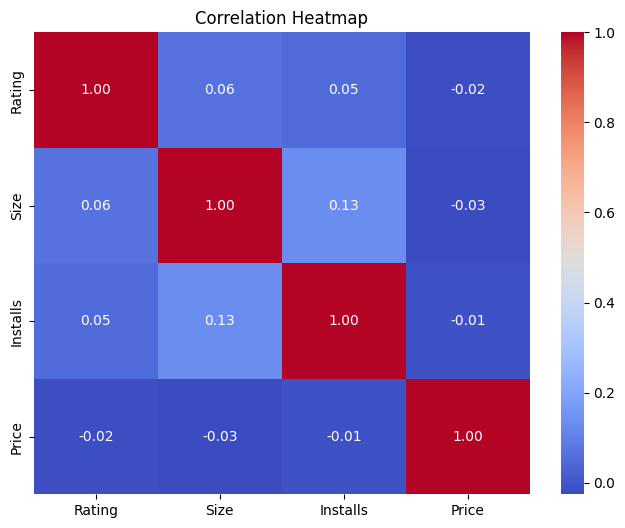

In [16]:
## Correlation Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(apps_df[['Rating', 'Size', 'Installs', 'Price']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Boxplot of Ratings by Category

C:\Users\user pc\AppData\Local\Temp\ipykernel_7640\151730206.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Rating', data=apps_df, palette='Set3')


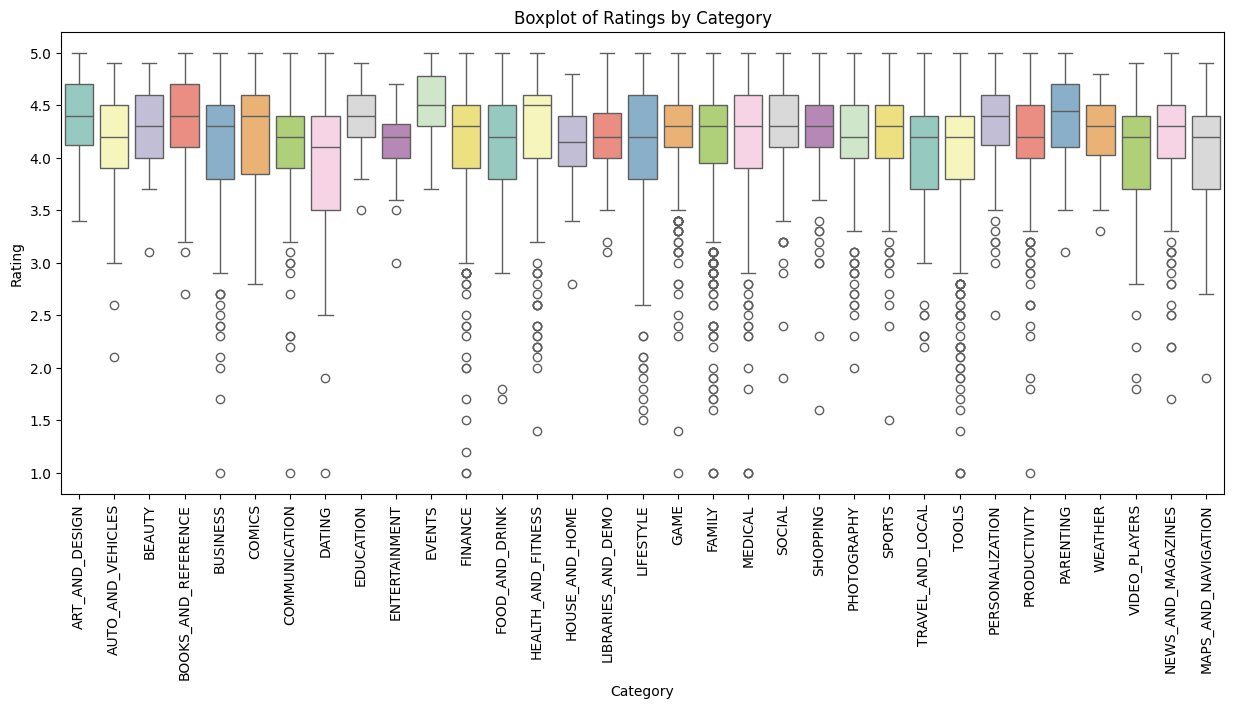

In [17]:
## Boxplot of Ratings by Category
plt.figure(figsize=(15, 6))
sns.boxplot(x='Category', y='Rating', data=apps_df, palette='Set3')
plt.xticks(rotation=90)
plt.xlabel('Category')
plt.ylabel('Rating')
plt.title('Boxplot of Ratings by Category')
plt.show()

# Free vs Paid Apps Distribution

In [ ]:
import plotly.express as px
#  Free vs Paid Apps Distribution
# Count of Free vs Paid apps
free_vs_paid = apps_df['Type'].value_counts()

# Create an interactive Pie Chart
fig = px.pie(
    values=free_vs_paid.values, 
    names=free_vs_paid.index, 
    title='Free vs Paid Apps Distribution', 
    color_discrete_sequence=['red', 'blue'],  # Same colors as before
)

# Show percentage and labels
fig.update_traces(textinfo='label+percent', pull=[0.05, 0]) 

fig.show()


# Sentiment Analysis

C:\Users\user pc\AppData\Local\Temp\ipykernel_7640\2706444425.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Sentiment', bbox_to_anchor=(1,1))


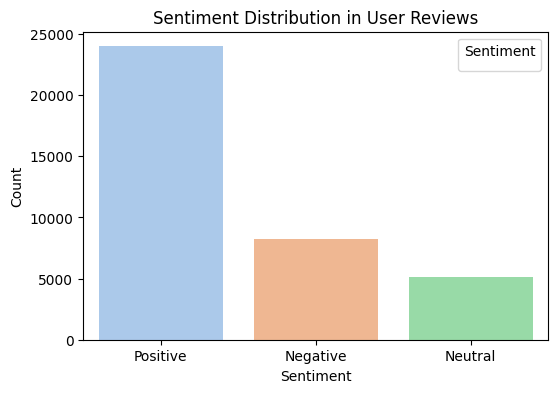

In [19]:
# **4. Sentiment Analysis**
## Assess user sentiments through reviews
sentiment_counts = reviews_df['Sentiment'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='pastel', hue=sentiment_counts.index)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution in User Reviews')
plt.legend(title='Sentiment', bbox_to_anchor=(1,1))
plt.show()

# Most Reviewed Apps

C:\Users\user pc\AppData\Local\Temp\ipykernel_7640\1487213296.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=most_reviewed.index, x=most_reviewed.values, palette='cividis')


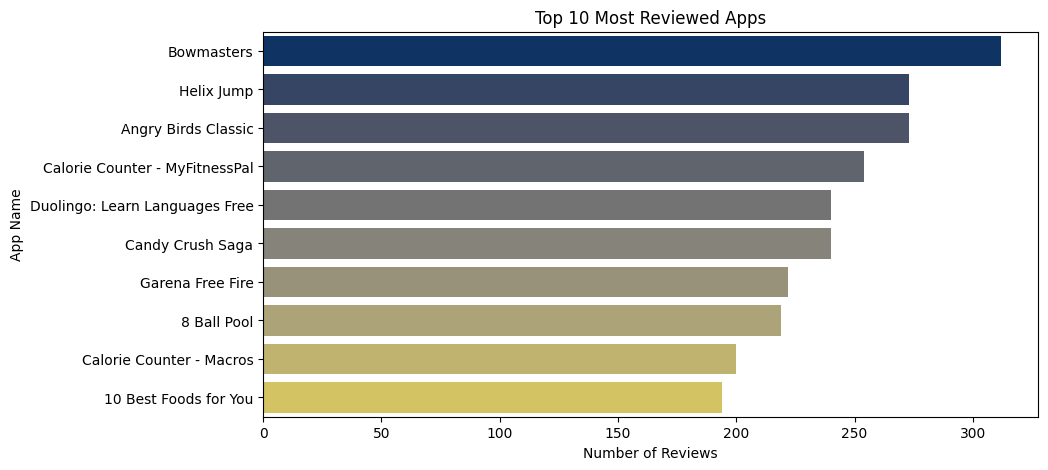

In [20]:
## Most Reviewed Apps
most_reviewed = reviews_df['App'].value_counts().head(10)
plt.figure(figsize=(10, 5))
sns.barplot(y=most_reviewed.index, x=most_reviewed.values, palette='cividis')
plt.xlabel('Number of Reviews')
plt.ylabel('App Name')
plt.title('Top 10 Most Reviewed Apps')
plt.show()


<Figure size 1400x1000 with 0 Axes>

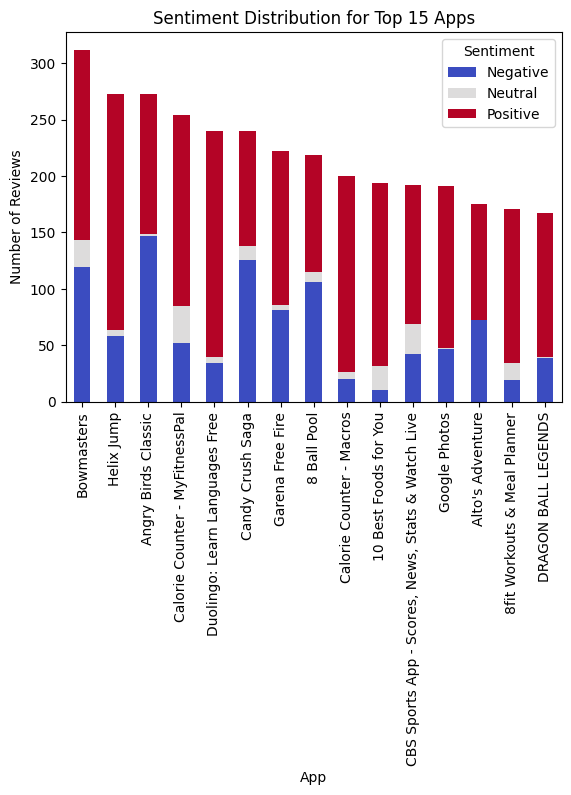

In [33]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Group by App and Sentiment
sentiment_by_category = reviews_df.groupby(['App', 'Sentiment']).size().unstack().fillna(0)

# Get top 15 reviewed apps
top_apps = reviews_df['App'].value_counts().head(15).index

# Filter sentiment data for these apps
sentiment_by_category_filtered = sentiment_by_category.loc[top_apps]

# Plot
plt.figure(figsize=(14, 10))
sentiment_by_category_filtered.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.xlabel('App')
plt.ylabel('Number of Reviews')
plt.title('Sentiment Distribution for Top 15 Apps')
plt.xticks(rotation=90)
plt.legend(title='Sentiment')
plt.show()


# App Ratings vs. Number of Reviews

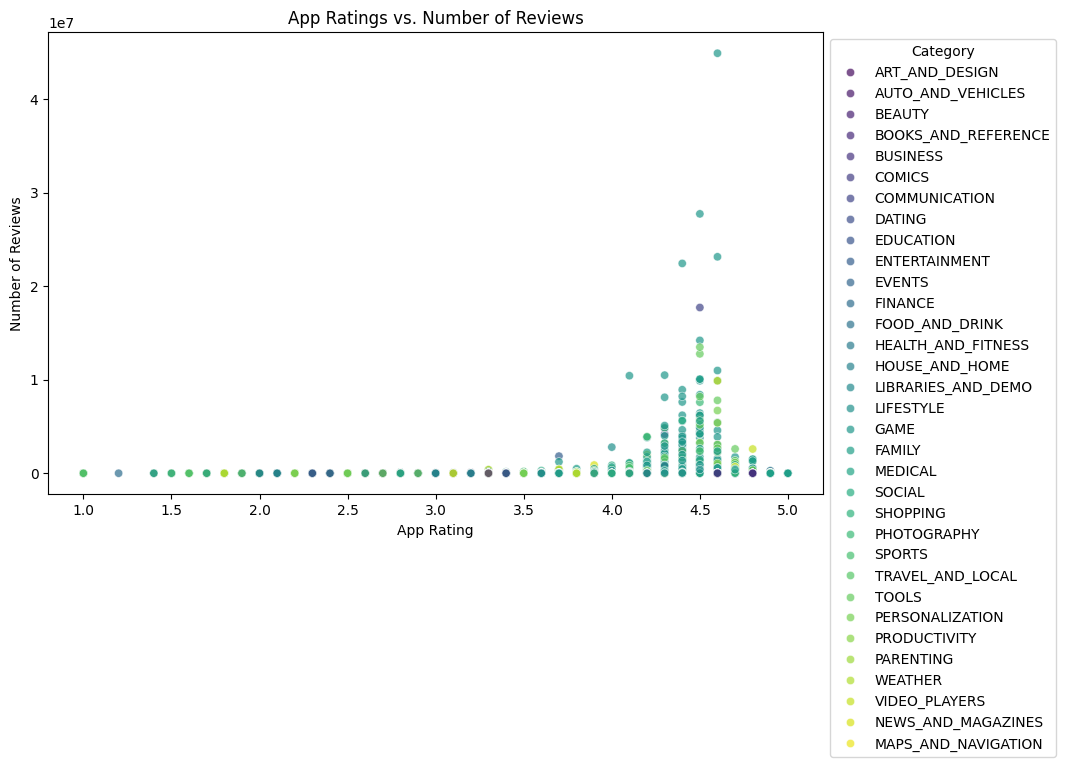

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=apps_df['Rating'], y=apps_df['Reviews'], hue=apps_df['Category'], palette='viridis', alpha=0.7)
plt.xlabel('App Rating')
plt.ylabel('Number of Reviews')
plt.title('App Ratings vs. Number of Reviews')
plt.legend(title='Category', bbox_to_anchor=(1,1))
plt.show()


# App Size vs. Installs

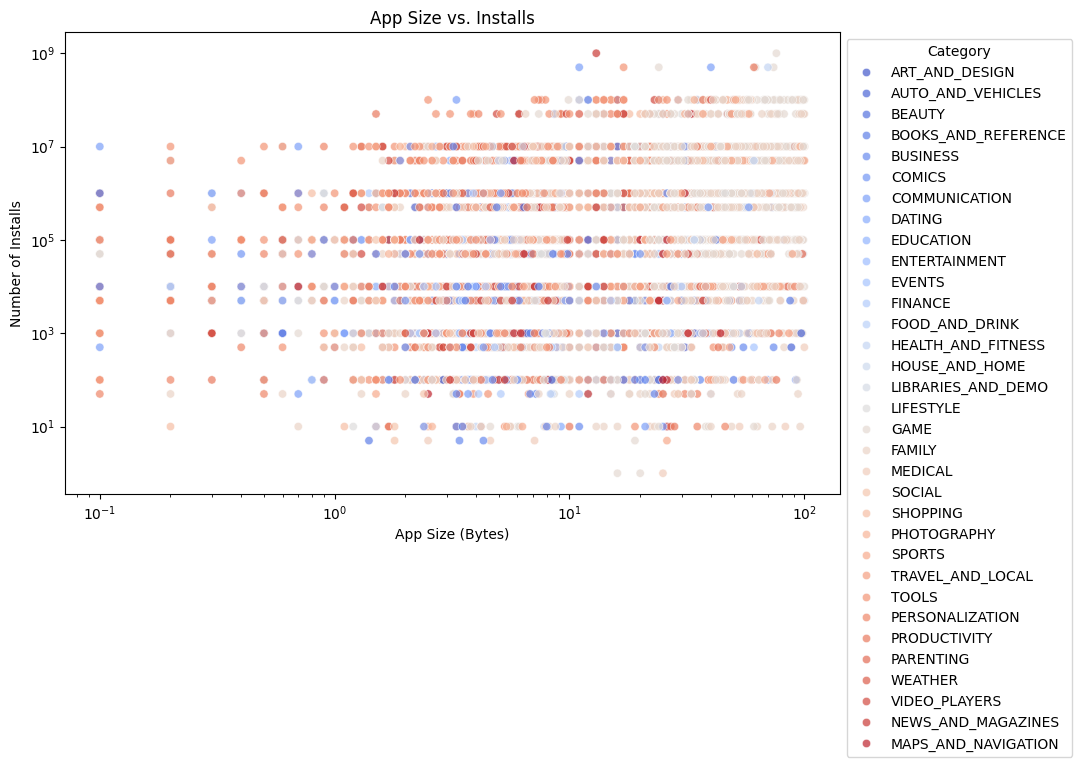

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=apps_df['Size'], y=apps_df['Installs'], hue=apps_df['Category'], palette='coolwarm', alpha=0.7)
plt.xlabel('App Size (Bytes)')
plt.ylabel('Number of Installs')
plt.title('App Size vs. Installs')
plt.legend(title='Category', bbox_to_anchor=(1,1))
plt.xscale('log')
plt.yscale('log')
plt.show()


# Sentiment Score by App

C:\Users\user pc\AppData\Local\Temp\ipykernel_7640\1818494452.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




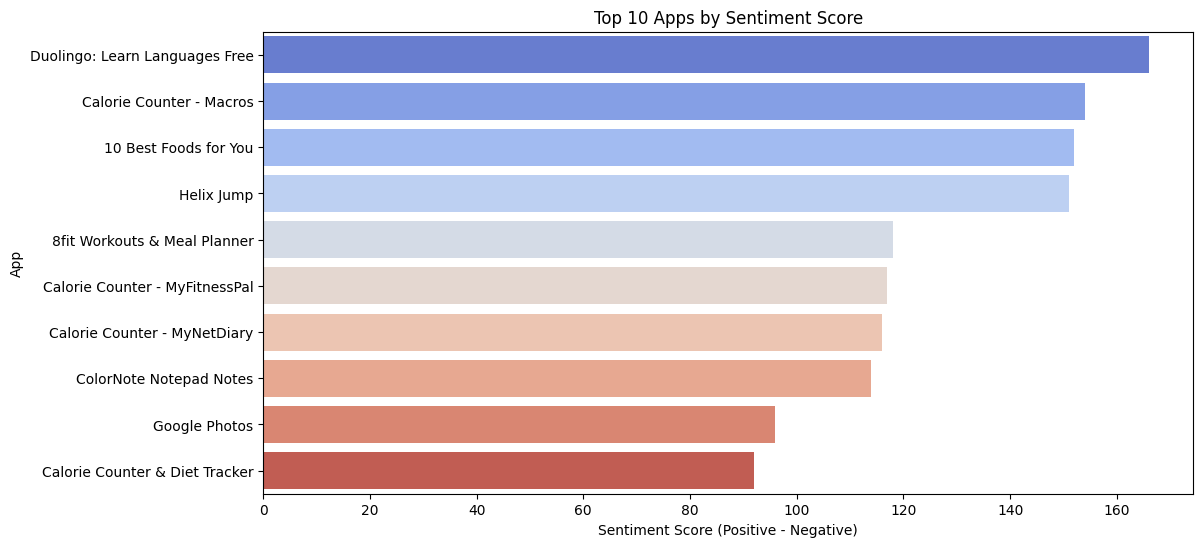

In [27]:
sentiment_scores = reviews_df.groupby('App')['Sentiment'].value_counts().unstack().fillna(0)
sentiment_scores['Score'] = sentiment_scores['Positive'] - sentiment_scores['Negative']

# Plot
plt.figure(figsize=(12, 6))
top_sentiments = sentiment_scores.nlargest(10, 'Score')
sns.barplot(y=top_sentiments.index, x=top_sentiments['Score'], palette='coolwarm')
plt.xlabel('Sentiment Score (Positive - Negative)')
plt.ylabel('App')
plt.title('Top 10 Apps by Sentiment Score')
plt.show()


C:\Users\user pc\AppData\Local\Temp\ipykernel_7640\4136636301.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




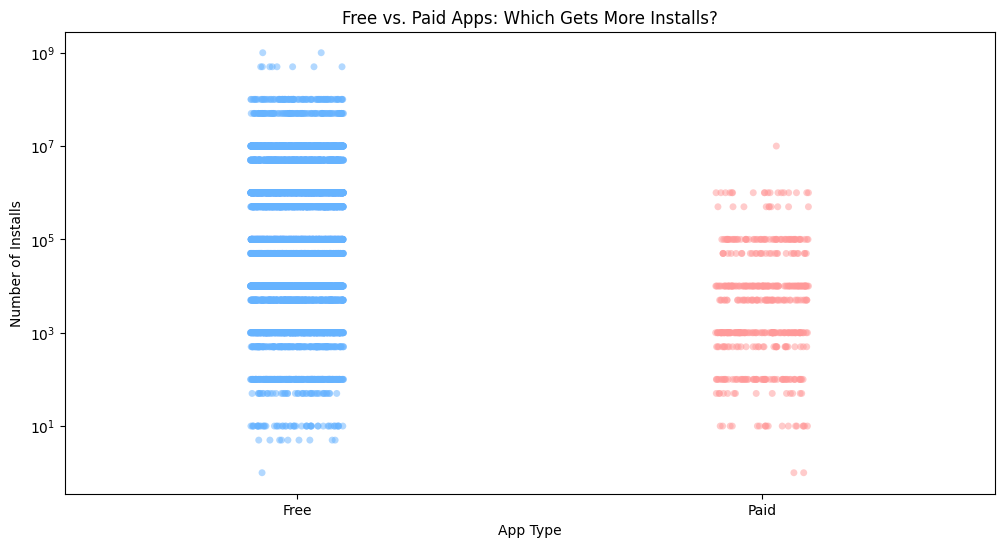

In [30]:
plt.figure(figsize=(12, 6))
sns.stripplot(x=apps_df['Type'], y=apps_df['Installs'], jitter=True, alpha=0.5, palette=['#66b3ff', '#ff9999'])
plt.yscale('log')
plt.xlabel('App Type')
plt.ylabel('Number of Installs')
plt.title('Free vs. Paid Apps: Which Gets More Installs?')
plt.show()


# Most Common Words in Reviews

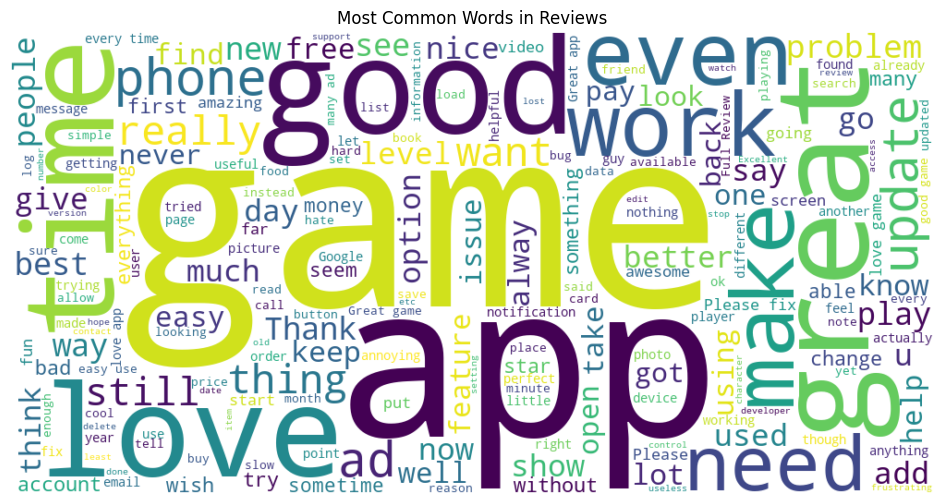

In [29]:
from wordcloud import WordCloud
all_reviews_text = ' '.join(reviews_df['Translated_Review'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='white').generate(all_reviews_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()


# Word Cloud for Positive & Negative Reviews

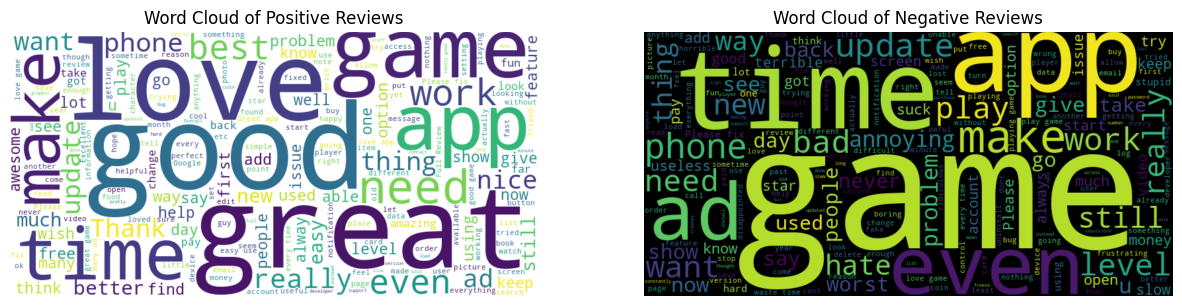

In [36]:
## Word Cloud for Positive & Negative Reviews


from wordcloud import WordCloud
positive_text = ' '.join(reviews_df[reviews_df['Sentiment'] == 'Positive']['Translated_Review'].dropna())
negative_text = ' '.join(reviews_df[reviews_df['Sentiment'] == 'Negative']['Translated_Review'].dropna())

fig, axes = plt.subplots(1, 2, figsize=(15, 7))
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color='black').generate(negative_text)

axes[0].imshow(wordcloud_pos, interpolation='bilinear')
axes[0].axis('off')
axes[0].set_title('Word Cloud of Positive Reviews')

axes[1].imshow(wordcloud_neg, interpolation='bilinear')
axes[1].axis('off')
axes[1].set_title('Word Cloud of Negative Reviews')

plt.show()

